This is only to see how the solution space relates to the number of baselines. The solution path is not considered in this exercise. 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ProjectPacks as pp
import ProjectFuncs as pf

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)  #spreads out plot surface for better visualization

from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

from IPython.display import HTML
HTML('../style/code_toggle.html')

In [65]:
## Choose number of timeslots
timeslots= 200
A_mod,l_mod,m_mod,ut,vt,arrayHxpos= pp.formatSParams('Array_Profile.txt','Field_Profile.txt',td=timeslots)

ut= ut[:3,:3]
vt= vt[:3,:3]

nbl= int(len(ut)*(len(ut)-1)/2)
t = np.arange(0, 5, 5/timeslots)          #The points at which we will be taking our "measurements"
noise = 0.000*np.random.normal(size=(timeslots*2*nbl)) #A noise vector used to manufacture "real" measurements.
print(noise.shape)

x_true = np.radians([0.4,0.5,4])          #The true (starting) values of our parameter vector (for alg).
x_mod = np.radians([l_mod[0],m_mod[0],A_mod[0]])

x_start= x_mod.copy()

d= pf.modfunc(x_true,ut,vt)

(1200,)


In [66]:
L= np.radians(np.arange(-1,1,2/timeslots))
M= np.radians(np.arange(-1,1,2/timeslots))
A= np.radians(np.arange(1,11,10/timeslots))

rr_constA= np.empty((timeslots,timeslots))
rr_constM= np.empty((timeslots,timeslots))
rr_constL= np.empty((timeslots,timeslots))

for a in range(timeslots):
    for b in range(timeslots):
        
        x_r= [L[a],M[b],x_true[2]]
        rr_constA[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))
        
for a in range(timeslots):
    for b in range(timeslots):
        
        x_r= [L[a],x_true[1],A[b]]
        rr_constM[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))
        
for a in range(timeslots):
    for b in range(timeslots):
        
        x_r= [x_true[0],M[a],A[b]]
        rr_constL[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))
        
Minimum_A= np.unravel_index(np.argmin(rr_constA),rr_constA.shape)
print("Minimum of (L,M) at: ", Minimum_A)
print(rr_constA[Minimum_A])

Minimum_M= np.unravel_index(np.argmin(rr_constM),rr_constM.shape)
print("Minimum of (L,A) at: ", Minimum_M)
print(rr_constM[Minimum_M])

Minimum_L= np.unravel_index(np.argmin(rr_constL),rr_constL.shape)
print("Minimum of (M,A) at: ",Minimum_L)
print(rr_constL[Minimum_L])

Minimum of (L,M) at:  (140, 150)
4.19302128027e-27
Minimum of (L,A) at:  (140, 60)
2.21854245594e-27
Minimum of (M,A) at:  (150, 60)
1.9531551718e-27


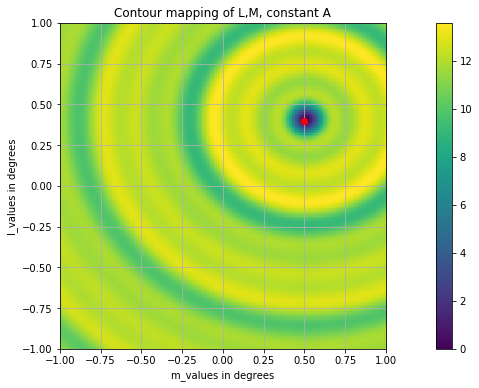

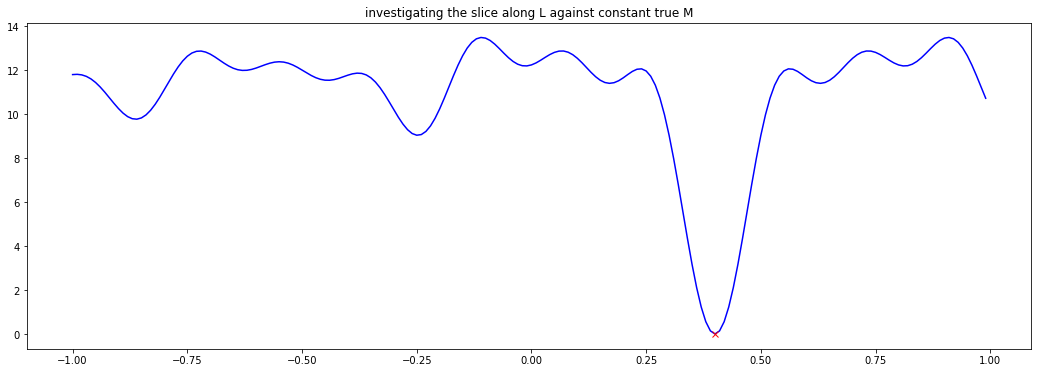

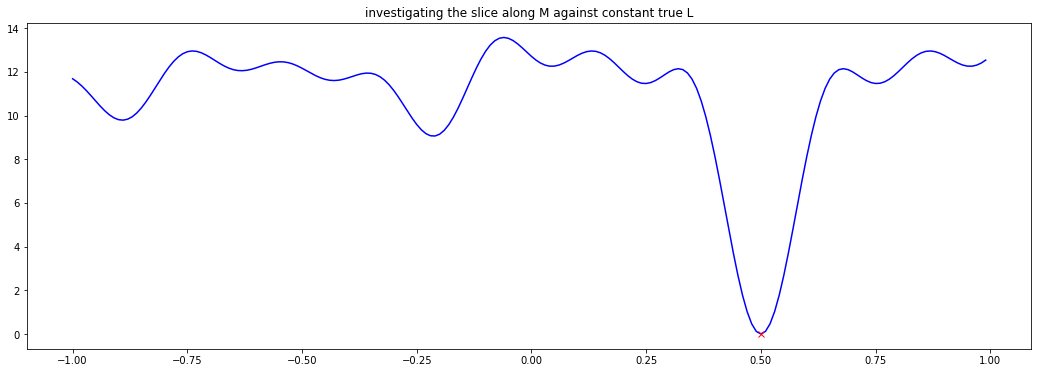

In [67]:
plt.imshow(np.flipud(rr_constA), extent=[-1,1,-1,1])
plt.plot(x_true[1]*180/np.pi,x_true[0]*180/np.pi,'ro',lw=1)
plt.colorbar()
plt.grid()
plt.xlabel("m_values in degrees")
plt.ylabel("l_values in degrees")
plt.title("Contour mapping of L,M, constant A")
plt.show()

plt.plot(L*180/np.pi,rr_constA[:,Minimum_A[1]], 'b', x_true[0]*180/np.pi,[0],'rx')
plt.title("investigating the slice along L against constant true M")
plt.show()
plt.plot(M*180/np.pi,rr_constA[Minimum_A[0],:], 'b', x_true[1]*180/np.pi,[0],'rx')
plt.title("investigating the slice along M against constant true L")
plt.show()

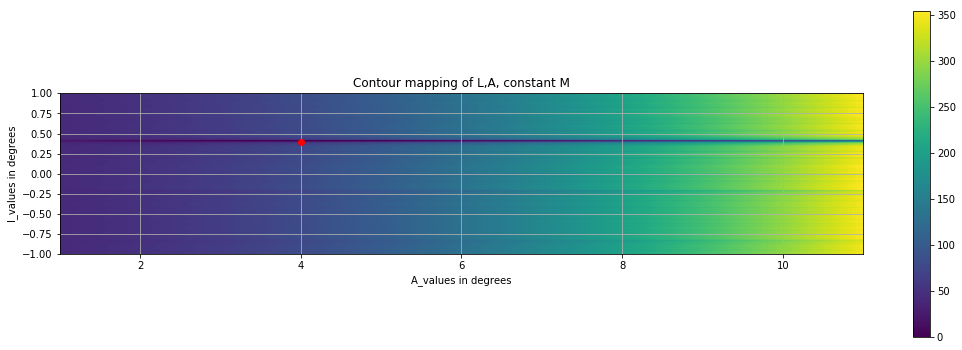

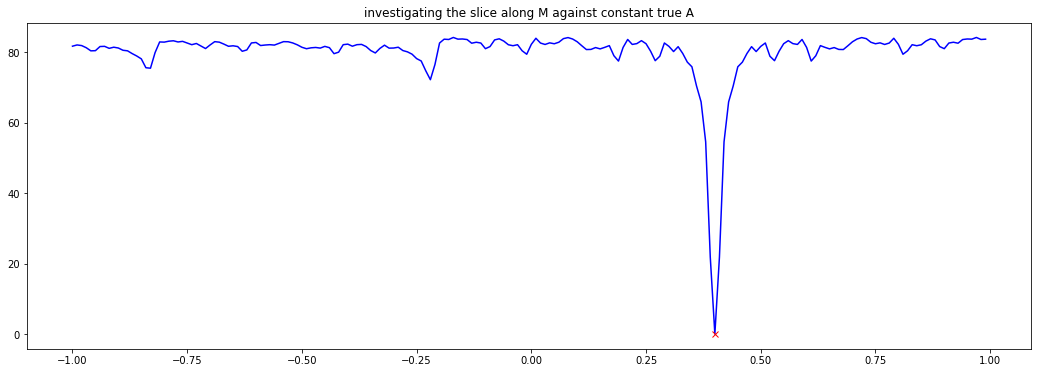

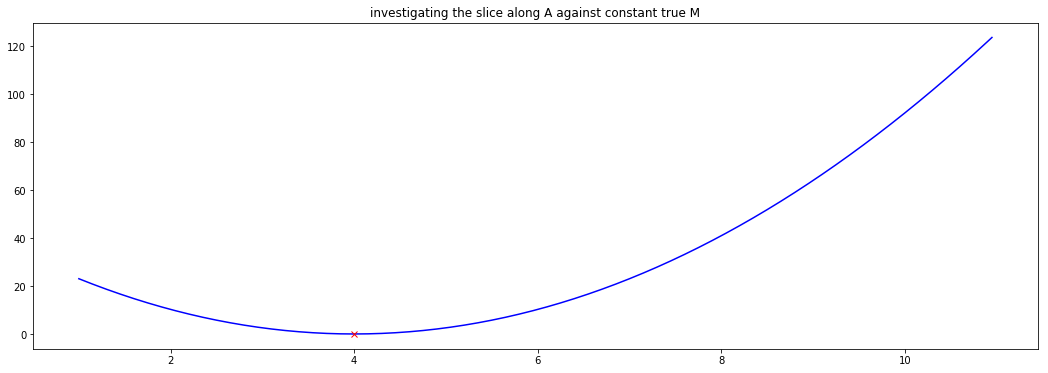

In [53]:
plt.imshow(np.flipud(rr_constM), extent=[1,11,-1,1])
plt.plot(x_true[2]*180/np.pi,x_true[0]*180/np.pi,'ro',lw=1)
plt.colorbar()
plt.grid()
plt.xlabel("A_values in degrees")
plt.ylabel("l_values in degrees")
plt.title("Contour mapping of L,A, constant M")
plt.show()

plt.plot(L*180/np.pi,rr_constM[:,Minimum_M[1]], 'b', x_true[0]*180/np.pi,[0],'rx')
plt.title("investigating the slice along M against constant true A")
plt.show()
plt.plot(A*180/np.pi,rr_constM[Minimum_M[0],:], 'b', x_true[2]*180/np.pi,[0],'rx')
plt.title("investigating the slice along A against constant true M")
plt.show()


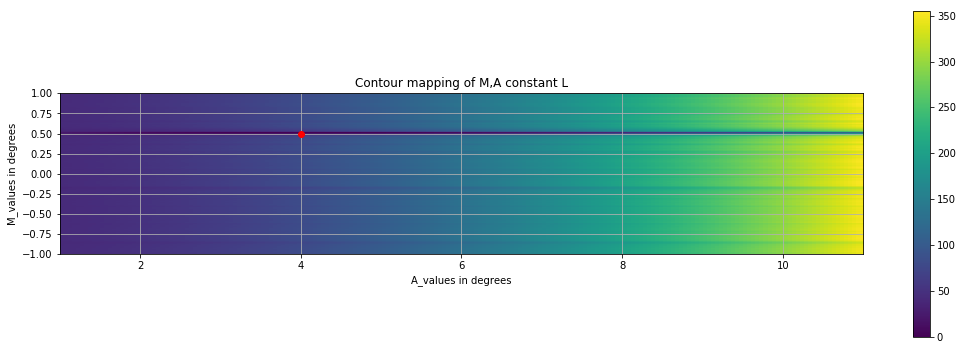

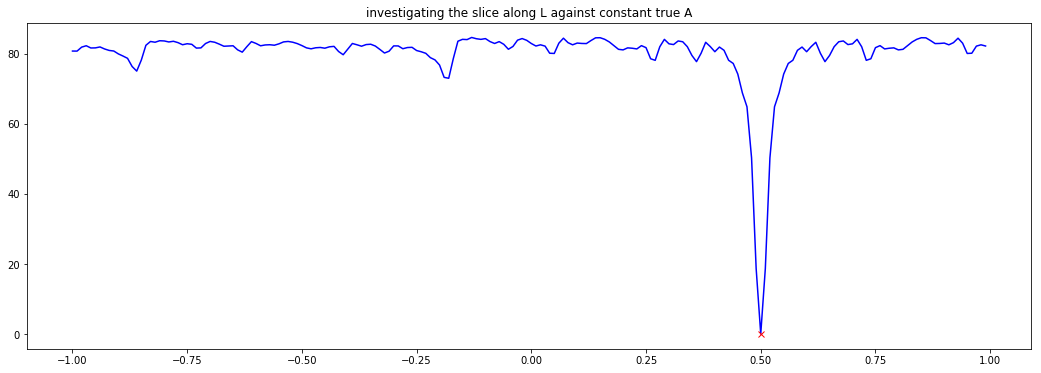

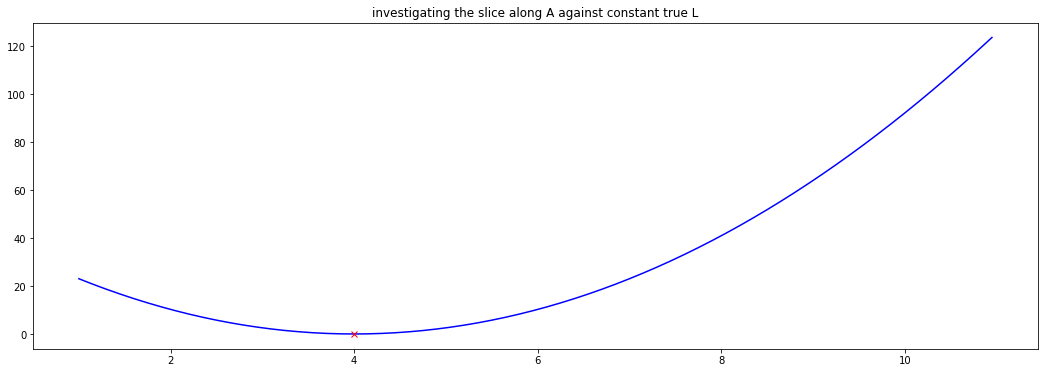

In [54]:
plt.imshow(np.flipud(rr_constL), extent=[1,11,-1,1])
plt.plot(x_true[2]*180/np.pi,x_true[1]*180/np.pi,'ro',lw=1)
plt.colorbar()
plt.grid()
plt.xlabel("A_values in degrees")
plt.ylabel("M_values in degrees")
plt.title("Contour mapping of M,A constant L")
plt.show()

plt.plot(M*180/np.pi,rr_constL[:,Minimum_L[1]], 'b', x_true[1]*180/np.pi,[0],'rx')
plt.title("investigating the slice along L against constant true A")
plt.show()
plt.plot(A*180/np.pi,rr_constL[Minimum_L[0],:], 'b', x_true[2]*180/np.pi,[0],'rx')
plt.title("investigating the slice along A against constant true L")
plt.show()

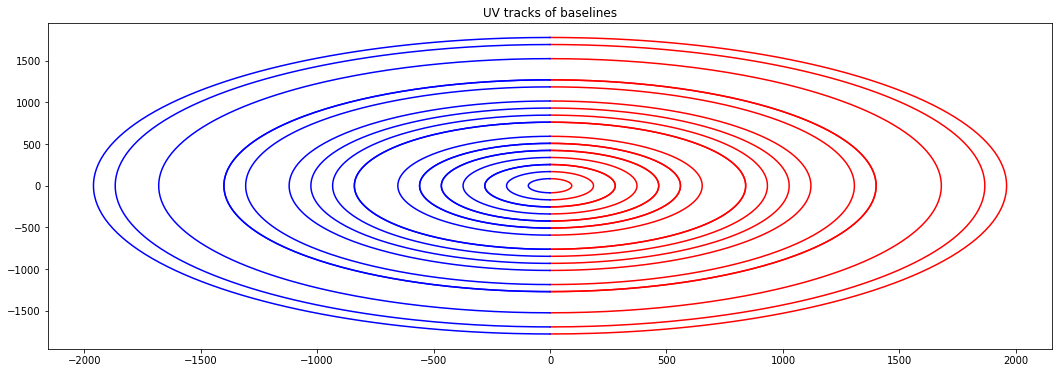

In [55]:
for k in range(len(ut)):
    for i in range(k,len(ut)):
        plt.plot(ut[k][i],vt[k][i],"r-", ut[i][k],vt[i][k],"b-")
        
plt.title("UV tracks of baselines")
plt.show()